# Cleaning & Preproccessing

This notebook is dedicated to the Cleaning & Preprocessing of the Ames, Iowa Dataset.

Before we begin modelling the data, we'll use this notebook to ensure that the data entering our model is clear of any anomolies that would cause us issues later in the analysis.

 ## Imports

In [1]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#data imports
with open('pickles/df.pkl', 'rb') as f:
    df = pickle.load(f)
    
with open('pickles/df_test.pkl', 'rb') as f:
    df_test = pickle.load(f)

### Cleaning

In the previous notebook, I defined a list of important features that I will incorporate into my initial iteration of my model. I will focus on cleaning those features, as well as several other interesting features, in this section

Those features are as follows:

* overall qual
* gr liv area
* garage area
* garage cars
* total bsmt sf
* 1st flr sf
* year built
* year remod/add

#### Overall Qual (cleaning)

From the data dictionary: Overall Qual (Ordinal) rates the overall material and finish of the house

       10	Very Excellent
       ...
       5	Average
       ...
       1	Very Poor

There are no missing values in the feature Overall Qual. Of the 2051 values in the feature, 5 are rated a 1. This is an outlier, but the outlier is natural and therefore I will leave it in the data.


In [3]:
# checking for null values (train)
df['overall qual'].isna().sum()
df['overall qual'].shape
df_test.shape

(878, 80)

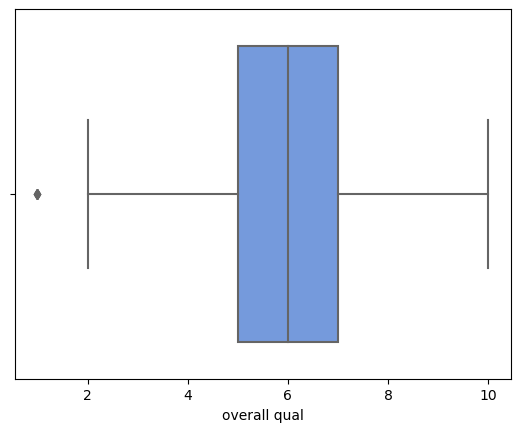

In [4]:
sns.boxplot(x= df['overall qual'], color ='cornflowerblue' );

In [5]:
# checking for null values (test)
df_test['overall qual'].isna().sum()
df_test['overall qual'].sort_values(ascending = False)

425    10
115    10
163    10
463    10
120    10
       ..
399     3
615     2
529     2
446     2
514     2
Name: overall qual, Length: 878, dtype: int64

#### Gr liv area (cleaning)

Gr Liv Area represents the above grade living area in square feet. It is presumed that this feature would exclude basement square footage.

The feature has no missing values. There are many outliers which can be seen in the boxplot below. I will revisit this  section after generating the model to determine if these outlier are to be included in the model.

In [6]:
# Checking for missing values (train)
df['gr liv area'].isna().sum()

0

In [7]:
# Checking for missing values (test)
df_test['gr liv area'].isna().sum()

0

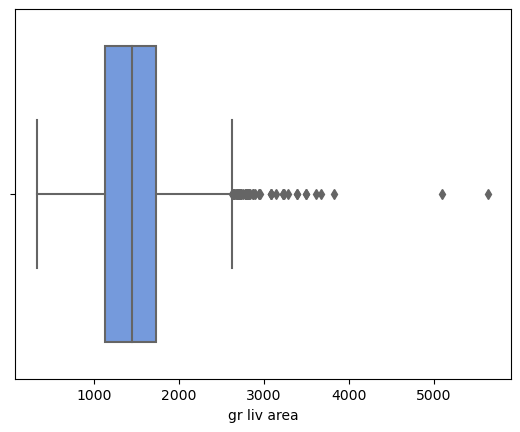

In [8]:
# checking for outliers (train)
sns.boxplot(x = df['gr liv area'],color = 'cornflowerblue');

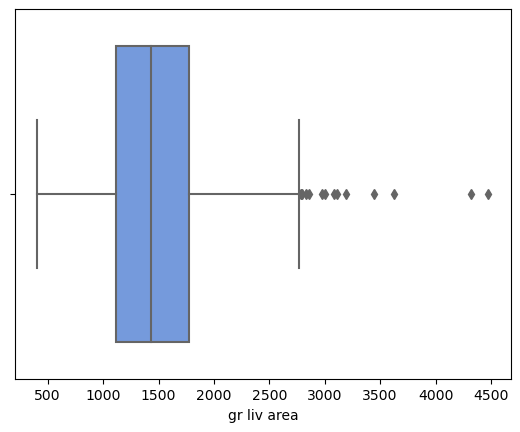

In [9]:
# checking for outliers (test)
sns.boxplot(x = df_test['gr liv area'],color = 'cornflowerblue');

#### Garage Area

Gr Liv Area represents the size of garage in square feet.

The feature has a missing value, which I removed below. There are many outliers which can be seen in the boxplot below. I will revisit this  section after generating the model to determine if these outlier are to be included in the model.

In [10]:
# replacing NaN values (train)
df['garage area'] = df['garage area'].fillna(0)
df_test.shape

(878, 80)

In [11]:
# replacing NaN values (test)
df_test['garage area'] = df_test['garage area'].fillna(0)

In [12]:
df['garage area'].sort_values(ascending = False)

960     1418.0
337     1356.0
1158    1348.0
1293    1314.0
1557    1231.0
         ...  
705        0.0
264        0.0
260        0.0
1814       0.0
457        0.0
Name: garage area, Length: 2050, dtype: float64

In [13]:
df_test['garage area'].sort_values(ascending = False)

580    1488
85     1390
399    1248
422    1200
238    1134
       ... 
45        0
566       0
350       0
629       0
803       0
Name: garage area, Length: 878, dtype: int64

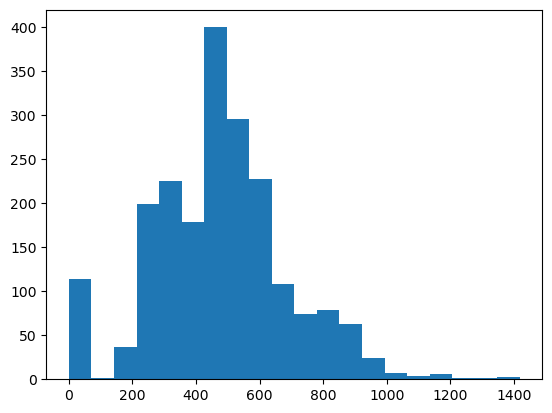

In [14]:
plt.hist(df['garage area'],bins =20);


#### Garage cars (cleaning)

The garage cars feature describes the number of cars that can fit in the garage. 

There are 2 outliers, however they are within reason and appear to be natural outliers. There are no missing values and the data is ready for modelling.

In [15]:
# is na (train)
df['garage cars'].isna().sum()
df_test.shape

(878, 80)

In [16]:
#is na (test)
df_test['garage cars'].isna().sum()

0

In [17]:
# checking outliers (test)
df_test['garage cars'].sort_values(ascending = False)

580    4
32     4
13     4
683    3
257    3
      ..
113    0
109    0
105    0
536    0
314    0
Name: garage cars, Length: 878, dtype: int64

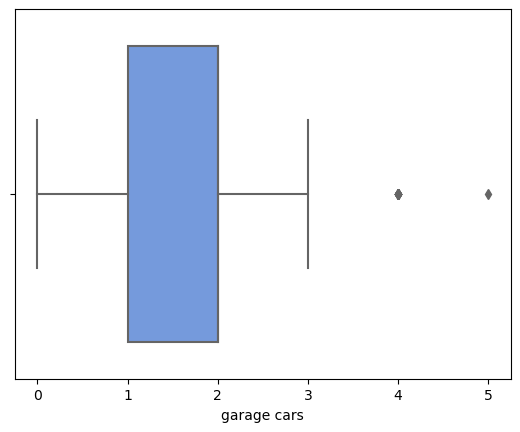

In [18]:
sns.boxplot(x =df['garage cars'],color = 'cornflowerblue');

#### Total Basement Sq.ft (cleaning)

The 'total bsmt sf' feature represents the square footage of the basement for the property.

There is one missing value in the data, which has been removed. There are several outliers, however more analysis will need to be completed to determine if the outliers are significant and not natural outliers.

In [19]:
# identifying missing values 
df['total bsmt sf'].isna().sum()

0

In [20]:
# removing missing values (train)
df['total bsmt sf'].sort_values(ascending= False)
df=df[df['total bsmt sf'].notna()]
df['total bsmt sf'].isna().sum()

0

In [21]:
# removing missing values (test)
df_test['total bsmt sf'].sort_values(ascending= False)
df_test=df_test[df_test['total bsmt sf'].notna()]
df_test['total bsmt sf'].isna().sum()

0

(878, 80)

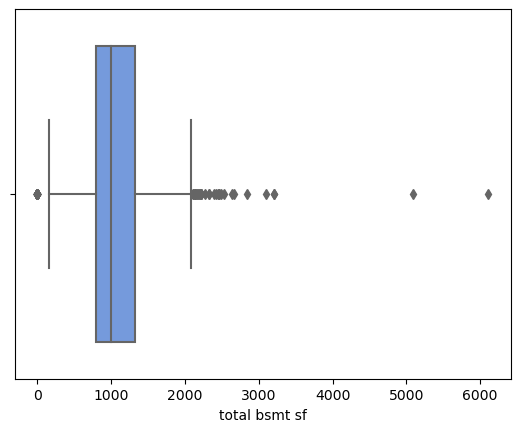

In [22]:
#checking for outliers (train)
sns.boxplot(x=df['total bsmt sf'], color = 'cornflowerblue' );
df_test.shape

In [23]:
# Checking if left side outlier is negative or 0
df['total bsmt sf'].sort_values(ascending= True)

1022       0.0
183        0.0
1889       0.0
1377       0.0
737        0.0
         ...  
1164    3094.0
328     3200.0
1147    3206.0
1885    5095.0
960     6110.0
Name: total bsmt sf, Length: 2050, dtype: float64

In [24]:
# Checking for outliers (test)
df_test['total bsmt sf'].sort_values(ascending= True)
df_test.shape



(878, 80)

#### 1st Floor Sq.ft (cleaning)

This feature describes the square footage of the 1st floor. There are no missing values in the data, however there are many outliers. All of the outliers are realistic and will be left in the data.

In [25]:
#checking for missing values
df['1st flr sf'].isna().sum()

0

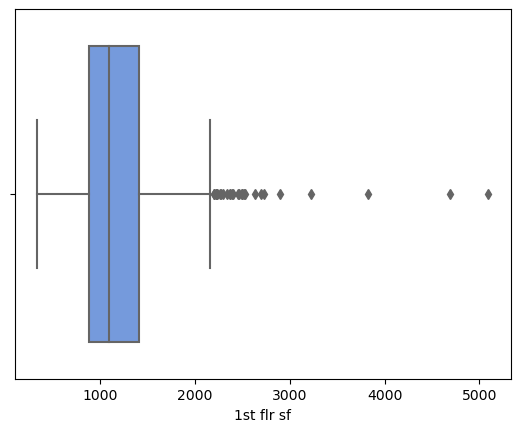

In [26]:
#checking for outliers (train)
sns.boxplot(x=df['1st flr sf'],color = 'cornflowerblue');

In [27]:
# checking for outliers (test)
df_test['total bsmt sf'].sort_values(ascending= True)
df_test.shape

(878, 80)

#### Year Built (cleaning)

This feature describes the year the house was built.

There are no missing values in the feature. Many of the homes were built in pre-1900, but that is within reason for the area. Ames, Iowa was founded in 1864 and therefore these outlier are natural outliers. The newest home was built in 2010, which is within the parameters of the dataset as outlined in the data dictionary.

In [28]:
#Checking for missing values (train)
df['year built'].isna().sum()

0

In [29]:
#checking for outliers (train)
df['year built'].sort_values(ascending = False)

144     2010
1238    2009
625     2009
1241    2009
1671    2009
        ... 
1939    1880
784     1880
1134    1879
136     1875
951     1872
Name: year built, Length: 2050, dtype: int64

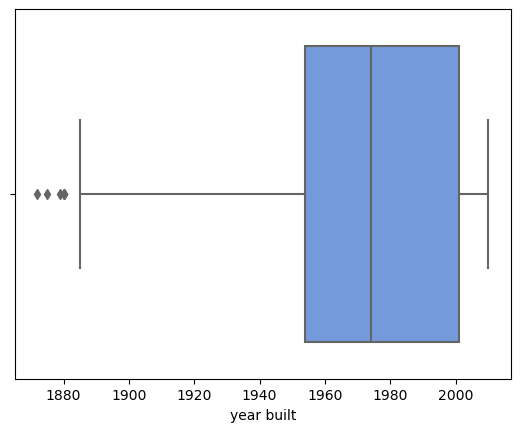

In [30]:
# Checking for outliers (train)
sns.boxplot(x = df['year built'], color = 'cornflowerblue');

In [31]:
# Checking for outliers (test)
df_test['year built'].sort_values(ascending = False)


315    2010
533    2010
608    2009
394    2009
696    2009
       ... 
51     1890
817    1885
19     1882
32     1880
27     1880
Name: year built, Length: 878, dtype: int64

#### Year Remodeled/Addition (cleaning)

The 'year remod/add' feature describes the year the house was remodelled or when an addition to the existing structure was added. If the house has not had either a remodel or an addition, the date provided is the same as the construction date.

The feature has no missing values. There are no outliers within the data. All dates provided are within the limits provided by the 'Year Built' feature, which implies that the remodel dates are realistic.

In [32]:
# Checking for missing values (train)
df['year remod/add'].isna().sum()

0

In [33]:
# Checking for missing values (test)
df_test['year remod/add'].isna().sum()

0

(878, 80)

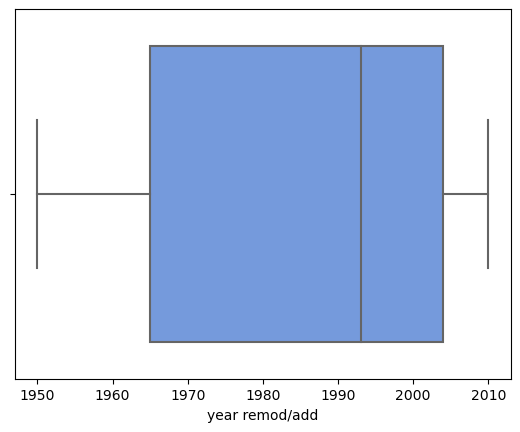

In [34]:
# Checking for outliers (train)
sns.boxplot(x=df['year remod/add'],color='cornflowerblue');
df_test.shape

In [35]:
# Checking for outliers (test)
df_test['year remod/add'].sort_values(ascending = False)

316    2010
323    2010
533    2010
452    2010
315    2010
       ... 
496    1950
507    1950
514    1950
521    1950
0      1950
Name: year remod/add, Length: 878, dtype: int64

#### Full Bath (cleaning)

The 'full bath' feature describes the number of full bathrooms in the house. The feature has no missing values and there are no outliers within the data.

In [36]:
# checking for null values (train)
df['full bath'].isna().sum()

# checking for null values (test)
df['full bath'].isna().sum()

0

1566    4
1605    4
1025    3
616     3
71      3
       ..
1372    0
1280    0
191     0
744     0
1518    0
Name: full bath, Length: 2050, dtype: int64

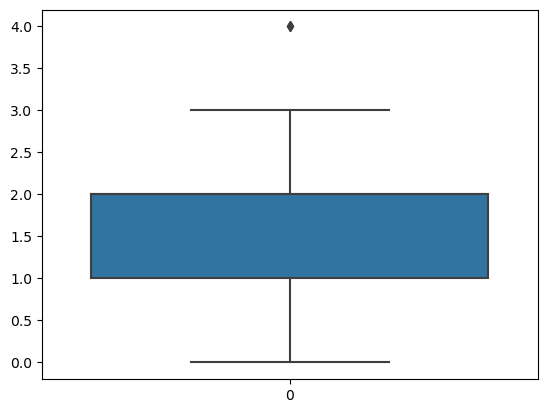

In [37]:
# looking for outliers (train)
sns.boxplot(df['full bath'])
df['full bath'].sort_values(ascending = False)

(878, 80)

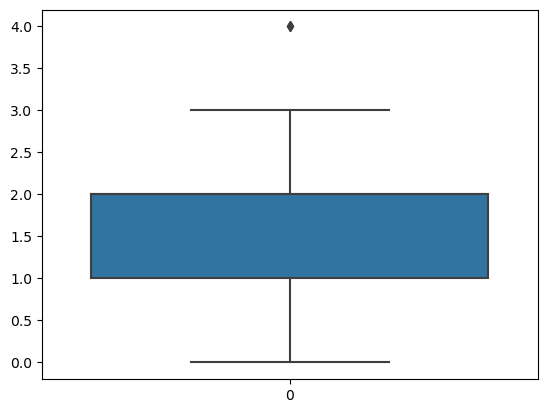

In [38]:
# looking for outliers (test)
sns.boxplot(df_test['full bath'])
df_test['full bath'].sort_values(ascending = False)
df_test.shape

#### Garage Year Built (cleaning)

The 'garage yr blt' feature describes the year the garage addition was built or when an addition to the existing structure was added. If the house has not had either a remodel or an addition, the date assigned to the feature is 0.

The feature has many missing values, as well as several outliers that would be outside what has been defined as the reasonable range. I have assigned NaN values in this column, as it is assumed that NaN values can be equated to a home not having a garage.

In [39]:
df['garage yr blt'].isna().sum()
df_test['garage yr blt'].isna().sum()

0

In [40]:
# looking for outliers (train)
df['garage yr blt'].sort_values(ascending = False)

1699    2207.0
144     2010.0
1241    2010.0
1732    2009.0
19      2009.0
         ...  
579        0.0
53         0.0
1754       0.0
1927       0.0
1519       0.0
Name: garage yr blt, Length: 2050, dtype: float64

In [41]:
# looking for outliers (test)
df_test['garage yr blt'].sort_values(ascending = False)

452    2010.0
316    2010.0
315    2010.0
323    2009.0
608    2009.0
        ...  
320       0.0
779       0.0
618       0.0
156       0.0
230       0.0
Name: garage yr blt, Length: 878, dtype: float64

In [42]:
# Setting null values to 0(train)

df['garage yr blt']=df['garage yr blt'].fillna(0)

In [43]:
# Setting null values to 0(train)
df_test['garage yr blt']=df_test['garage yr blt'].fillna(0)
df_test['garage yr blt'].sort_values(ascending = False)

452    2010.0
316    2010.0
315    2010.0
323    2009.0
608    2009.0
        ...  
320       0.0
779       0.0
618       0.0
156       0.0
230       0.0
Name: garage yr blt, Length: 878, dtype: float64

#### Year Remodeled/Addition (cleaning)

The 'mas vnr area' feature describes masonry veneer area in square feet for the exterior of the house.

The feature has several missing values, which are represented as NaN. It's assumed, with the help of the data dictionary, that NaN represents a home without masonry vaneer. Therefore, the NaN values will be assigned to 0.

totrms abvgrd     0.503509

In [44]:
# checking for null values
df['mas vnr area'].isna().sum()
df_test.shape

(878, 80)

In [45]:
# removing null values (train)
df['mas vnr area']=df['mas vnr area'].fillna(0)

In [46]:
# removing null values (test)
df_test['mas vnr area']=df_test['mas vnr area'].fillna(0)
df_test['mas vnr area'].isna().sum()

0

In [47]:
# finding outliers (train)
df['mas vnr area'].sort_values(ascending = False)

1409    1600.0
1885    1224.0
1151    1129.0
378     1115.0
489     1110.0
         ...  
836        0.0
834        0.0
833        0.0
831        0.0
2050       0.0
Name: mas vnr area, Length: 2050, dtype: float64

In [48]:
# finding outliers (test)
df_test['mas vnr area'].sort_values(ascending = False)
#df_test[df_test['mas vnr area'] == 0] = 1e-6

df['year built']
df['garage yr blt']

0       1976.0
1       1997.0
2       1953.0
3       2007.0
4       1957.0
         ...  
2046    2007.0
2047    1961.0
2048    1929.0
2049    1956.0
2050    1999.0
Name: garage yr blt, Length: 2050, dtype: float64

### Other Interesting Features (Cleaning)

#### Lot frontage (cleaning)
Lot frontage represents the distance from the property line to the public easement and I'm assuming that a lot frontage = NaN means that the property doesn't have a front yard or an offset from the public easement. I'm setting NaN to zero to account for this, rather than remove the values.

In [49]:
# Setting null values to 0 (train)
df['lot frontage'] = df['lot frontage'].replace(np.nan,0)
df.shape

(2050, 81)

In [50]:
# Setting null values to 0 (test)
df_test['lot frontage'] = df_test['lot frontage'].replace(np.nan,0)
df_test.shape

(878, 80)

(878, 80)

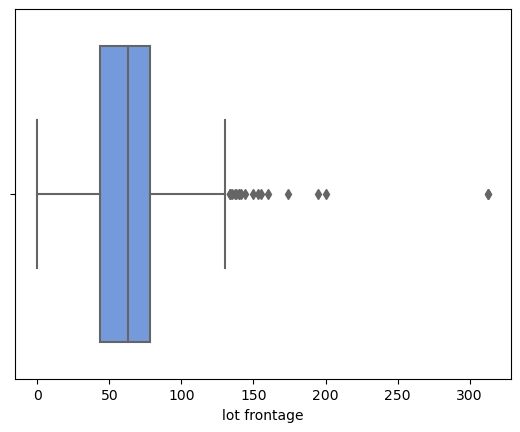

In [51]:
sns.boxplot(x = df['lot frontage'], color = 'cornflowerblue');
df_test.shape

As shown above in the boxplot, there's an outlier in the frontage data showing a single property with a very large lot frontage. I believe this outlier to be natural and therefore I am leaving it in the dataset. All other data points appear normal.

In [52]:
with open('pickles/df.pkl', 'wb') as f:
    pickle.dump(df, f)
      
with open('pickles/df_test.pkl', 'wb') as f:
    pickle.dump(df_test, f)